In [3]:
# Import statements
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

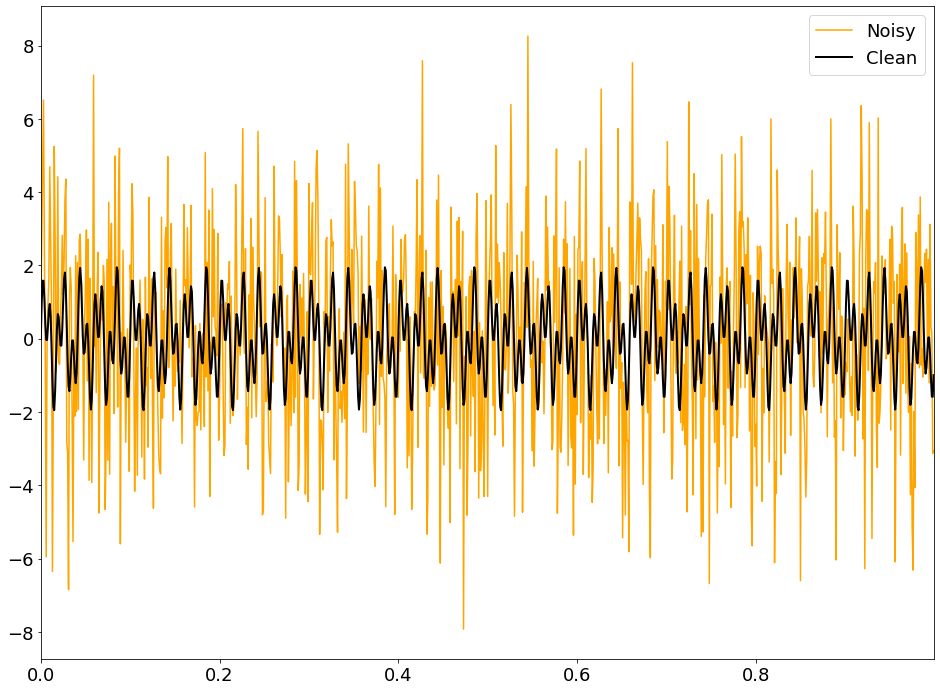

In [11]:
# create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # some random frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))

plt.plot(t,f,color='orange',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='black',LineWidth=2,label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


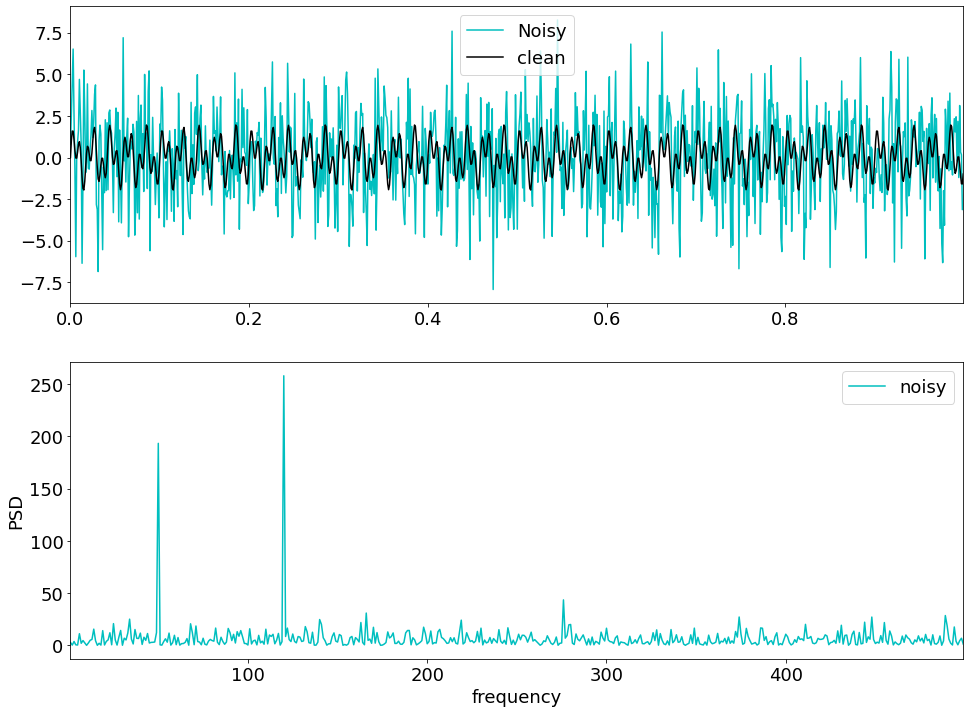

In [18]:
n = len(t)
fhat = np.fft.fft(f,n)  # It's that simple in numpy!
PSD = fhat * np.conj(fhat) / n # PSD = Power spectral density
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth='1.5',label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth='1.5',label='clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth='1.5',label='noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.legend()

plt.show()


In [19]:
'''
We can clearly see two spikes in the above graph that are 50hz and 120hz, which is no surprise as they are the
frequencies that we constructed. So we can choose a number, say 100 and any Fourier coeff. below 100 can be zeroed out 
to give us pure frequencies of 50 and 120hz.
'''

'\nWe can clearly see two spikes in the above graph that are 50hz and 120hz, which is no surprise as they are the\nfrequencies that we constructed. So we can choose a number, say 100 and any Fourier coeff. below 100 can be zeroed out \nto give us pure frequencies of 50 and 120hz.\n'

In [20]:
# Filtering out the noise using the PSD
indices = PSD > 100
PSD_clean = PSD * indices # zeroing out all the PSD below 100
fhat = indices * fhat
f_filter = np.fft.ifft(fhat) # Inverse FFT

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


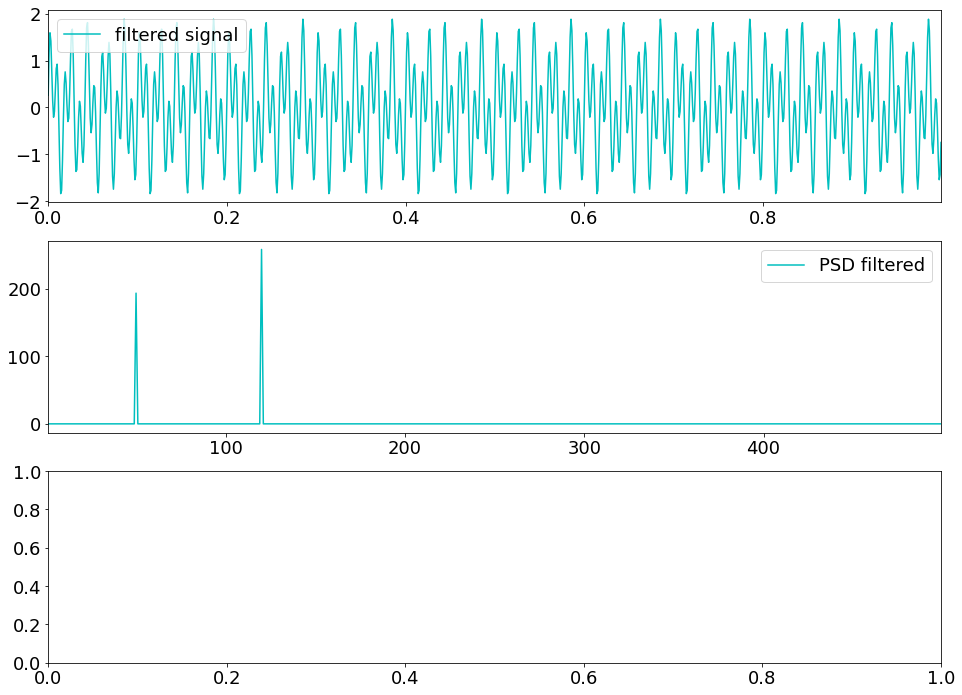

In [21]:
# Now plotting the filtered data
fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t,f_filter,color='c',LineWidth='1.5',label='filtered signal')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD_clean[L],color='c', LineWidth='1.5',label='PSD filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
plt.show()